크롬드라이버 다운로드 (크롬버전 확인해서 맞는거 다운받기)

크롬드라이버 경로 옮겨주기(파일이랑 같은 위치)

pip install selenium

웹 크롤링 맛보기

In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('chromedriver.exe')

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_4640\530843676.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


웹페이지 접속

In [3]:
url = 'https://www.naver.com/'

driver.get(url)

웹페이지(HTML) 다운로드

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" c
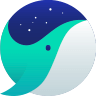
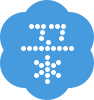

In [4]:
html = driver.page_source

html

멜론 노래 순위 정보 크롤링

In [18]:
url = 'https://www.melon.com/chart/index.htm'

driver.get(url)

HTML 다운로드 및 bs4로 읽기

In [19]:
from bs4 import BeautifulSoup

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
soup

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" pr

100개의 노래 tag 찾기

노가다방법

In [20]:
soup.select('tbody > tr')

[<tr class="lst50" data-song-no="34819473" id="lst50">
 <td><div class="wrap t_right"><input class="input_check" name="input_check" title="사건의 지평선 곡 선택" type="checkbox" value="34819473"/></div></td>
 <td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
 <!-- 차트순위 추가 -->
 <td><div class="wrap">
 <span class="rank_wrap" title="순위 동일">
 <span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
 <span class="none">0</span>
 </span>
 </div></td>
 <td><div class="wrap">
 <a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10903868');" title="YOUNHA 6th Album Repackage 'END THEORY : Final Edition'">
 <img alt="YOUNHA 6th Album Repackage 'END THEORY : Final Edition' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/109/03/868/10903868_20220330103544_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
 <span class="bg_album_frame"></span>
 </a>
 

In [42]:
songs = soup.select('tbody > tr')
print(len(songs))

100


In [43]:
print(songs[0])

<tr class="lst50" data-song-no="34819473" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="사건의 지평선 곡 선택" type="checkbox" value="34819473"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10903868');" title="YOUNHA 6th Album Repackage 'END THEORY : Final Edition'">
<img alt="YOUNHA 6th Album Repackage 'END THEORY : Final Edition' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/109/03/868/10903868_20220330103544_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td>

In [44]:
len(songs)

100

In [45]:
soup.select('tr')

[<tr>
 <th scope="col">
 <div class="wrap t_right"><input class="input_check d_checkall" title="곡 목록 전체 선택" type="checkbox"/></div>
 </th>
 <th scope="col">
 <div class="wrap t_center"><span class="rank">순위</span></div>
 </th>
 <th scope="col">
 <div class="wrap none">순위등락</div>
 </th>
 <th scope="col">
 <div class="wrap none">앨범이미지</div>
 </th>
 <th scope="col">
 <div class="wrap none">곡 상세가기</div>
 </th>
 <th scope="col">
 <div class="wrap pd_l_12">곡정보</div>
 </th>
 <th scope="col">
 <div class="wrap pd_l_12">앨범</div>
 </th>
 <th scope="col">
 <div class="wrap pd_l_30">좋아요</div>
 </th>
 <th scope="col">
 <div class="wrap t_center">듣기</div>
 </th>
 <th scope="col">
 <div class="wrap t_center">담기</div>
 </th>
 <th scope="col">
 <div class="wrap t_center">다운</div>
 </th>
 <th scope="col">
 <div class="wrap t_center">뮤비</div>
 </th>
 </tr>,
 <tr class="lst50" data-song-no="34819473" id="lst50">
 <td><div class="wrap t_right"><input class="input_check" name="input_check" title="사건의 지평선 곡 

In [46]:
soup.select('tr')[0]

<tr>
<th scope="col">
<div class="wrap t_right"><input class="input_check d_checkall" title="곡 목록 전체 선택" type="checkbox"/></div>
</th>
<th scope="col">
<div class="wrap t_center"><span class="rank">순위</span></div>
</th>
<th scope="col">
<div class="wrap none">순위등락</div>
</th>
<th scope="col">
<div class="wrap none">앨범이미지</div>
</th>
<th scope="col">
<div class="wrap none">곡 상세가기</div>
</th>
<th scope="col">
<div class="wrap pd_l_12">곡정보</div>
</th>
<th scope="col">
<div class="wrap pd_l_12">앨범</div>
</th>
<th scope="col">
<div class="wrap pd_l_30">좋아요</div>
</th>
<th scope="col">
<div class="wrap t_center">듣기</div>
</th>
<th scope="col">
<div class="wrap t_center">담기</div>
</th>
<th scope="col">
<div class="wrap t_center">다운</div>
</th>
<th scope="col">
<div class="wrap t_center">뮤비</div>
</th>
</tr>

In [47]:
soup.select('tr')[1]

<tr class="lst50" data-song-no="34819473" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="사건의 지평선 곡 선택" type="checkbox" value="34819473"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10903868');" title="YOUNHA 6th Album Repackage 'END THEORY : Final Edition'">
<img alt="YOUNHA 6th Album Repackage 'END THEORY : Final Edition' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/109/03/868/10903868_20220330103544_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td>

In [48]:
songs = soup.select('tr')[1:]
print(len(songs))
songs[0]

100


<tr class="lst50" data-song-no="34819473" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="사건의 지평선 곡 선택" type="checkbox" value="34819473"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10903868');" title="YOUNHA 6th Album Repackage 'END THEORY : Final Edition'">
<img alt="YOUNHA 6th Album Repackage 'END THEORY : Final Edition' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/109/03/868/10903868_20220330103544_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td>

In [50]:
song = songs[0]

title = song.select('a')

In [51]:
len(title)

6

In [52]:
title[0]

<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10903868');" title="YOUNHA 6th Album Repackage 'END THEORY : Final Edition'">
<img alt="YOUNHA 6th Album Repackage 'END THEORY : Final Edition' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/109/03/868/10903868_20220330103544_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>

In [53]:
title[1]

<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('34819473');" title="사건의 지평선 곡정보"><span class="none">곡정보</span></a>

In [54]:
title[2]

<a href="javascript:melon.play.playSong('1000002721',34819473);" title="사건의 지평선 재생">사건의 지평선</a>

In [55]:
title[2].text

'사건의 지평선'

곡 제목 찾는 방법

In [56]:
song.select('span > a')

[<a href="javascript:melon.play.playSong('1000002721',34819473);" title="사건의 지평선 재생">사건의 지평선</a>,
 <a href="javascript:melon.link.goArtistDetail('203912');" title="윤하 (YOUNHA) - 페이지 이동">윤하 (YOUNHA)</a>]

In [57]:
title = song.select('span > a')
len(title)

2

In [58]:
title[0].text

'사건의 지평선'

In [59]:
title[1].text

'윤하 (YOUNHA)'

곡 제목 찾는 방법
- 쉽게 찾는게 불가능 할 때

In [60]:
song.select('div.ellipsis.rank01 > span > a')

[<a href="javascript:melon.play.playSong('1000002721',34819473);" title="사건의 지평선 재생">사건의 지평선</a>]

In [61]:
title = song.select('div.ellipsis.rank01 > span > a')
len(title)

1

In [62]:
title[0].text

'사건의 지평선'

In [63]:
# 가수정보 찾기
singer = song.select('div.ellipsis.rank02 > a')
singer[0].text


'윤하 (YOUNHA)'

멜론 100위 노래 순위 정보 가져오기

In [64]:
print(songs[:10])

[<tr class="lst50" data-song-no="34819473" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="사건의 지평선 곡 선택" type="checkbox" value="34819473"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10903868');" title="YOUNHA 6th Album Repackage 'END THEORY : Final Edition'">
<img alt="YOUNHA 6th Album Repackage 'END THEORY : Final Edition' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/109/03/868/10903868_20220330103544_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td

In [65]:
print(len(songs))

100


In [67]:
for song in songs :
    title = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer = song.select('div.ellipsis.rank02 > a')[0].text
    print(title, singer, sep = ',')

사건의 지평선,윤하 (YOUNHA)
Hype boy,NewJeans
ANTIFRAGILE,LE SSERAFIM (르세라핌)
마이웨이 (MY WAY) (Prod. R.Tee),저스디스 (JUSTHIS)
After LIKE,IVE (아이브)
Nxde,(여자)아이들
사랑은 늘 도망가,임영웅
Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack] (Feat. FIFA Sound),정국
우리들의 블루스,임영웅
새삥 (Prod. ZICO) (Feat. 호미들),지코 (ZICO)
Attention,NewJeans
다시 만날 수 있을까,임영웅
London Boy,임영웅
LOVE DIVE,IVE (아이브)
Polaroid,임영웅
Snowman,Sia
Monologue,테이
무지개,임영웅
All I Want for Christmas Is You,Mariah Carey
이제 나만 믿어요,임영웅
아버지,임영웅
A bientot,임영웅
손이 참 곱던 그대,임영웅
Rush Hour (Feat. j-hope of BTS),Crush
인생찬가,임영웅
사랑해 진짜,임영웅
Shut Down,BLACKPINK
위하여 (We Higher) (Prod. GroovyRoom),그루비룸 (GroovyRoom)
연애편지,임영웅
Santa Tell Me,Ariana Grande
WHEN I MOVE,카라
Pink Venom,BLACKPINK
잘가요,주호
해요 (2022),#안녕
자격지심 (Feat. ZICO),BE'O (비오)
너의 모든 순간,성시경
보금자리,임영웅
딱 10CM만,10CM
사랑인가 봐,멜로망스
TOMBOY,(여자)아이들
Last Christmas,Ariana Grande
내가 아니라도,주호
첫 눈,EXO
그때 그 순간 그대로 (그그그),WSG워너비 (가야G)
미리 메리 크리스마스 (Feat. 천둥 Of MBLAQ),아이유
그 겨울이 잠든 거리에서,경서예지
Cookie,NewJeans
그라데이션,10CM
정이라고 하자

총정리

In [71]:
from selenium import webdriver

# 크롬 드라이버 실행
driver = webdriver.Chrome('chromedriver.exe')

# url 접속하기
url = 'https://www.melon.com/chart/index.htm'
driver.get(url)

# html 불러와서 bs4로 읽기
from bs4 import BeautifulSoup

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

songs = soup.select('tr')[1:]

# 1위 부터 100위까지 노래, 가수 가져오기
for song in songs :
    title = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer = song.select('div.ellipsis.rank02 > a')[0].text
    print(title, singer, sep = ',')

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_4640\2856667694.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


사건의 지평선,윤하 (YOUNHA)
Hype boy,NewJeans
ANTIFRAGILE,LE SSERAFIM (르세라핌)
마이웨이 (MY WAY) (Prod. R.Tee),저스디스 (JUSTHIS)
After LIKE,IVE (아이브)
Nxde,(여자)아이들
사랑은 늘 도망가,임영웅
새삥 (Prod. ZICO) (Feat. 호미들),지코 (ZICO)
Attention,NewJeans
Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack] (Feat. FIFA Sound),정국
우리들의 블루스,임영웅
LOVE DIVE,IVE (아이브)
다시 만날 수 있을까,임영웅
Monologue,테이
Snowman,Sia
London Boy,임영웅
All I Want for Christmas Is You,Mariah Carey
Polaroid,임영웅
무지개,임영웅
이제 나만 믿어요,임영웅
아버지,임영웅
Rush Hour (Feat. j-hope of BTS),Crush
Shut Down,BLACKPINK
A bientot,임영웅
위하여 (We Higher) (Prod. GroovyRoom),그루비룸 (GroovyRoom)
손이 참 곱던 그대,임영웅
인생찬가,임영웅
Pink Venom,BLACKPINK
Santa Tell Me,Ariana Grande
사랑해 진짜,임영웅
잘가요,주호
WHEN I MOVE,카라
해요 (2022),#안녕
연애편지,임영웅
자격지심 (Feat. ZICO),BE'O (비오)
너의 모든 순간,성시경
딱 10CM만,10CM
TOMBOY,(여자)아이들
사랑인가 봐,멜로망스
내가 아니라도,주호
보금자리,임영웅
그때 그 순간 그대로 (그그그),WSG워너비 (가야G)
첫 눈,EXO
Last Christmas,Ariana Grande
그 겨울이 잠든 거리에서,경서예지
미리 메리 크리스마스 (Feat. 천둥 Of MBLAQ),아이유
Cookie,NewJeans
그라데이션,10CM
정이라고 하자

In [72]:
from selenium import webdriver

# 크롬 드라이버 실행
driver = webdriver.Chrome('chromedriver.exe')

# url 접속하기
url = 'https://www.melon.com/chart/index.htm'
driver.get(url)

# html 불러와서 bs4로 읽기
from bs4 import BeautifulSoup

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

#########################################################################################

song_data = []
rank = 1 # 초기화
songs = soup.select('tr')[1:]

# 1위 부터 100위까지 노래, 가수 가져오기
for song in songs :
    title = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer = song.select('div.ellipsis.rank02 > a')[0].text
    mylist = ['melon', rank, title, singer]
    song_data.append(mylist)
    rank += 1
print(song_data)

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_4640\2507591360.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


[['melon', 1, '사건의 지평선', '윤하 (YOUNHA)'], ['melon', 2, 'Hype boy', 'NewJeans'], ['melon', 3, 'ANTIFRAGILE', 'LE SSERAFIM (르세라핌)'], ['melon', 4, '마이웨이 (MY WAY) (Prod. R.Tee)', '저스디스 (JUSTHIS)'], ['melon', 5, 'After LIKE', 'IVE (아이브)'], ['melon', 6, 'Nxde', '(여자)아이들'], ['melon', 7, '사랑은 늘 도망가', '임영웅'], ['melon', 8, '새삥 (Prod. ZICO) (Feat. 호미들)', '지코 (ZICO)'], ['melon', 9, 'Attention', 'NewJeans'], ['melon', 10, 'Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack] (Feat. FIFA Sound)', '정국'], ['melon', 11, '우리들의 블루스', '임영웅'], ['melon', 12, 'LOVE DIVE', 'IVE (아이브)'], ['melon', 13, '다시 만날 수 있을까', '임영웅'], ['melon', 14, 'Monologue', '테이'], ['melon', 15, 'Snowman', 'Sia'], ['melon', 16, 'London Boy', '임영웅'], ['melon', 17, 'All I Want for Christmas Is You', 'Mariah Carey'], ['melon', 18, 'Polaroid', '임영웅'], ['melon', 19, '무지개', '임영웅'], ['melon', 20, '이제 나만 믿어요', '임영웅'], ['melon', 21, '아버지', '임영웅'], ['melon', 22, 'Rush Hour (Feat. j-hope of BTS)', 'Crush'], ['melon', 23, 'Shut 

In [73]:
import pandas as pd

df = pd.DataFrame(song_data, columns = ['서비스업체','순위','타이틀(곡명)','가수'])
df

,서비스업체,순위,타이틀(곡명),가수
0,melon,1,사건의 지평선,윤하 (YOUNHA)
1,melon,2,Hype boy,NewJeans
2,melon,3,ANTIFRAGILE,LE SSERAFIM (르세라핌)
3,melon,4,마이웨이 (MY WAY) (Prod. R.Tee),저스디스 (JUSTHIS)
4,melon,5,After LIKE,IVE (아이브)
...,...,...,...,...
95,melon,96,드라마,아이유
96,melon,97,그날의 그대여,헤이즈 (Heize)
97,melon,98,POP!,나연 (TWICE)
98,melon,99,Left and Right (Feat. Jung Kook of BTS),Charlie Puth


In [74]:
df.to_excel('./melon_rank_20221214.xlsx', index = False)

벅스뮤직 크롤링

In [126]:
from selenium import webdriver

# 크롬 드라이버 실행
driver = webdriver.Chrome('chromedriver.exe')

# url 접속하기
url = 'https://music.bugs.co.kr/chart'
driver.get(url)

from bs4 import BeautifulSoup

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

song_data = []
rank = 1 # 초기화

songs = soup.select('tr')[1:]
songs

for song in songs[:100] :
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    mylist = ['벅스', rank, title, singer]
    song_data.append(mylist)
    rank += 1
print(song_data)

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_4640\651487768.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


[['벅스', 1, '사건의 지평선', '윤하(Younha/ユンナ)'], ['벅스', 2, 'Hype Boy', 'NewJeans'], ['벅스', 3, 'WHEN I MOVE', '카라(Kara)'], ['벅스', 4, 'ANTIFRAGILE', 'LE SSERAFIM (르세라핌)'], ['벅스', 5, 'After LIKE', 'IVE (아이브)'], ['벅스', 6, 'Attention', 'NewJeans'], ['벅스', 7, 'All I Want for Christmas Is You', 'Mariah Carey(머라이어 캐리)'], ['벅스', 8, 'Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack] (feat. FIFA Sound)', '정국'], ['벅스', 9, 'Snowman', 'Sia(시아)'], ['벅스', 10, 'Nxde', '(여자)아이들'], ['벅스', 11, 'Santa Tell Me', 'Ariana Grande(아리아나 그란데)'], ['벅스', 12, 'LOVE DIVE', 'IVE (아이브)'], ['벅스', 13, '새삥 (Prod. ZICO) (Feat. 호미들)', '지코'], ['벅스', 14, 'Shut Down', 'BLACKPINK'], ['벅스', 15, '마이웨이 (MY WAY) (Prod. R.Tee)', '저스디스(JUSTHIS)'], ['벅스', 16, 'Rush Hour (Feat. j-hope of BTS)', 'Crush'], ['벅스', 17, '오르트구름', '윤하(Younha/ユンナ)'], ['벅스', 18, 'Pink Venom', 'BLACKPINK'], ['벅스', 19, '자격지심 (Feat. ZICO)', "BE'O (비오)"], ['벅스', 20, 'Made You Look', 'Meghan Trainor(메간 트레이너)'], ['벅스', 21, '미리 메리 크리스마스 (feat. 천둥 Of MBLA

In [127]:
import pandas as pd

df = pd.DataFrame(song_data, columns = ['서비스업체','순위','타이틀(곡명)','가수'])
df

df.to_excel('./벅스_rank_20221214.xlsx', index = False)

In [128]:
pd.read_excel('벅스_rank_20221214.xlsx')

,서비스업체,순위,타이틀(곡명),가수
0,벅스,1,사건의 지평선,윤하(Younha/ユンナ)
1,벅스,2,Hype Boy,NewJeans
2,벅스,3,WHEN I MOVE,카라(Kara)
3,벅스,4,ANTIFRAGILE,LE SSERAFIM (르세라핌)
4,벅스,5,After LIKE,IVE (아이브)
...,...,...,...,...
95,벅스,96,나쁜X,비비(BIBI)
96,벅스,97,가을밤에 든 생각,잔나비
97,벅스,98,"Flick (Feat. BE'O (비오), 김하온 (HAON)) (Prod. Gro...",노윤하
98,벅스,99,겨울이 좋아졌어,정승환
